In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/fruits.zip

Archive:  /content/drive/MyDrive/fruits.zip
replace __MACOSX/._fruits? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


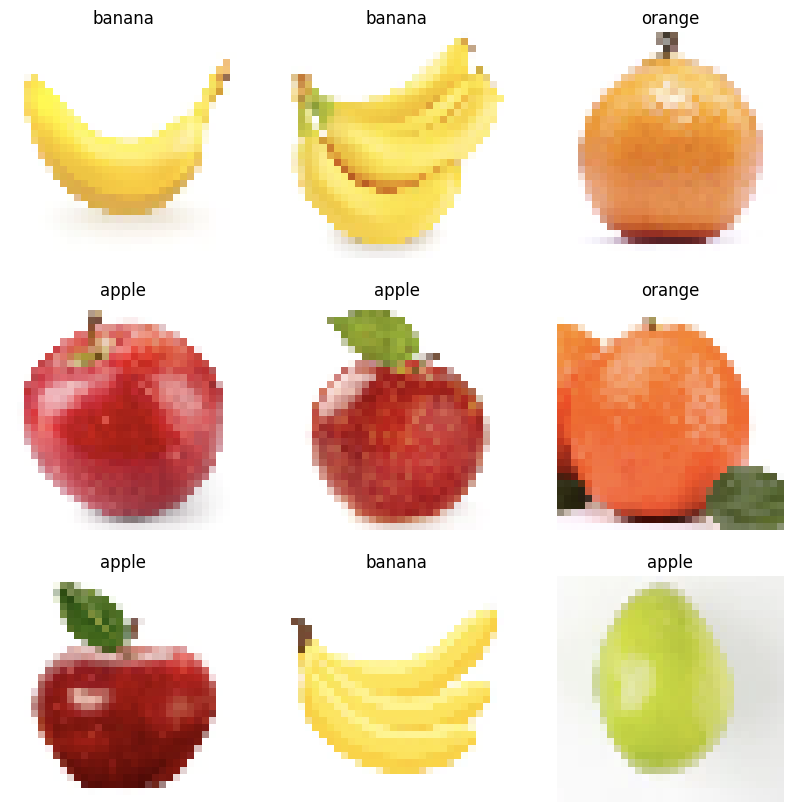

In [ ]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 5s 142ms/step - loss: 0.9881 - accuracy: 0.5543 - val_loss: 0.9097 - val_accuracy: 0.6667
Epoch 2/10
23/23 [==============================] - 2s 51ms/step - loss: 0.7357 - accuracy: 0.6891 - val_loss: 0.6529 - val_accuracy: 0.7879
Epoch 3/10
23/23 [==============================] - 2s 49ms/step - loss: 0.3956 - accuracy: 0.8696 - val_loss: 0.5766 - val_accuracy: 0.7121
Epoch 4/10
23/23 [==============================] - 2s 48ms/step - loss: 0.2871 - accuracy: 0.8804 - val_loss: 0.2017 - val_accuracy: 0.9394
Epoch 5/10
23/23 [==============================] - 2s 48ms/step - loss: 0.1770 - accuracy: 0.9413 - val_loss: 0.3436 - val_accuracy: 0.8182
Epoch 6/10
23/23 [==============================] - 2s 47ms/step - loss: 0.1722 - accuracy: 0.9457 - val_loss: 0.1149 - val_accuracy: 0.9697
Epoch 7/10
23/23 [==============================] - 2s 47ms/step - loss: 0.1044 - accuracy: 0.9739 - val_loss: 0.8398 - val_accuracy: 0.7424
Epoch 8/10
2

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9385


[0.17253535985946655, 0.9384615421295166]

tf.Tensor(
[[-2.1344597   5.11328    -3.7400331 ]
 [ 2.689211   -5.29359    -0.2889164 ]
 [-1.541685    2.4138715  -1.2914637 ]
 [-0.6397634   1.1198164  -1.2735356 ]
 [ 4.941557   -7.674627   -1.9191854 ]
 [-2.3703077   5.357049   -3.8388093 ]
 [-2.518449   -1.7916666   2.583859  ]
 [-0.36069566  1.0551623  -1.5699112 ]
 [-3.5839593  -3.342522    5.154031  ]
 [ 4.7745852  -8.191989   -1.2877249 ]
 [-2.235324    5.222943   -3.7826316 ]
 [ 3.755483   -2.2179818  -2.0739784 ]
 [-3.1137702  -3.7571733   5.230009  ]
 [-0.07472094  1.7108141  -2.0259423 ]
 [ 5.8618784  -9.210131   -1.1717707 ]
 [-3.4282234  -3.6967645   5.510822  ]
 [ 0.9968377  -2.9372547  -0.59499216]
 [-2.3824918   4.84417    -3.2351892 ]
 [-3.545087   -2.576321    4.5636725 ]
 [-3.3390925   6.086285   -3.4406784 ]], shape=(20, 3), dtype=float32) tf.Tensor([1 0 1 0 0 1 2 1 2 0 1 0 2 0 0 2 0 1 2 1], shape=(20,), dtype=int32)


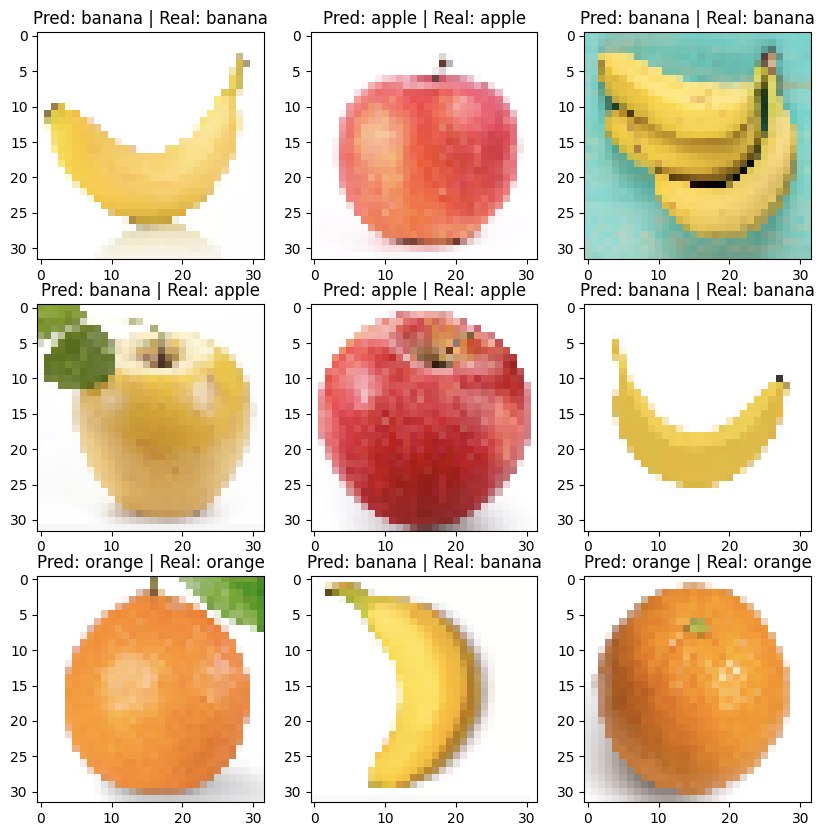

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications, labels)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("prediction-model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
class_names

['apple', 'banana', 'orange']